<a id='section_id'></a>

<h1> <div align="center"><a> Проект «Восстановление золота из руды» </a></div>

## Подготовка данных

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor

In [73]:
df_train = pd.read_csv("/datasets/gold_recovery_train_new.csv")
df_test = pd.read_csv("/datasets/gold_recovery_test_new.csv")
df_full = pd.read_csv("/datasets/gold_recovery_full_new.csv")

display(df_train.head(1), df_test.head(1), df_full.head(1))

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.19202,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.84198


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.08,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.31785,4.872511,-500.037437,26.705889,-499.709414


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.19202,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.84198


In [74]:
#Вычислим эффективность обогащения на обучающей выборке для признака rougher.output.recovery. 
C = df_train["rougher.output.concentrate_au"]
F = df_train["rougher.input.feed_au"]
T = df_train["rougher.output.tail_au"] 

df_train["rougher.output.recovery_check"] = C* (F-T) / (F* (C-T)) * 100
mean_absolute_error(df_train["rougher.output.recovery"], df_train["rougher.output.recovery_check"])

9.73512347450521e-15

**Значение MAE близки к 0: эффективность обогащения рассчитана верно.**

In [75]:
display(df_train.shape, df_test.shape, df_full.shape)

(14149, 88)

(5290, 53)

(19439, 87)

Тестовая выборка составляет 27% от общей выборки, что укладывается в стандартный диапазон 25%-30%.
Оценим имеющиеся массивы данных.

In [76]:
display(df_train.info())
display(df_test.info())
display(df_full.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 88 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


None

Мы видим пропуски во всех трех массивах, однако их количество незначительное (порядка 1%), поэтому строки с пропусками в последующем можно удалить. Однако для начала нужно определить признаки, которые помогут построить адекватную модель. В тестовой выборке доступно 53 признака из 87. Можно заметить, что в ней недоступны следующие типы параметров: output (параметры продукта), в т.ч. целевые признаки, а также calculation (расчетные характеристики). Эти параметры недоступны, потому что замеряются и/или рассчитываются значительно позже самих производственных процессов. Все эти признаки количественные и имеют дробный тип float.
**Для последюущей проверки моделей на тестовой выборке, добавим в нее целевые признаки из полного датасета, соотнеся их по столбцу date.**

In [77]:
test_recovery = df_full.loc[:,["date", "rougher.output.recovery",'final.output.recovery']]
df_test = df_test.merge(test_recovery, on='date', how='left')
df_test.head(1)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,2016-09-01 00:59:59,210.800909,14.993118,8.08,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,8.016656,-501.289139,7.946562,-432.31785,4.872511,-500.037437,26.705889,-499.709414,89.993421,70.273583


[В начало](#section_id)

## Анализ данных

,Au,Ag,Pb
Этап,,,
rougher.input.feed,7.866577,8.579195,3.522778
rougher.output.concentrate,19.439958,11.775812,7.664555
primary_cleaner.output.concentrate,32.386836,8.200916,9.588862
final.output.concentrate,44.003792,5.142034,10.132960


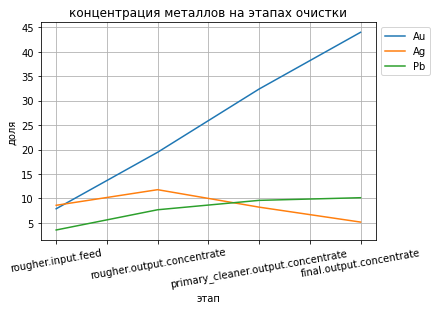

In [78]:
#сначала отследим динамику концетрации металлов в сырье
concentrate = pd.DataFrame({'Этап': ["rougher.input.feed", "rougher.output.concentrate", "primary_cleaner.output.concentrate", 
                       "final.output.concentrate"], 
              "Au": [df_train["rougher.input.feed_au"].mean(), df_train["rougher.output.concentrate_au"].mean(),
                     df_train["primary_cleaner.output.concentrate_au"].mean(), df_train["final.output.concentrate_au"].mean()],
              "Ag": [df_train["rougher.input.feed_ag"].mean(), df_train["rougher.output.concentrate_ag"].mean(),
                     df_train["primary_cleaner.output.concentrate_ag"].mean(), df_train["final.output.concentrate_ag"].mean()],
              "Pb": [df_train["rougher.input.feed_pb"].mean(), df_train["rougher.output.concentrate_pb"].mean(),
                     df_train["primary_cleaner.output.concentrate_pb"].mean(), df_train["final.output.concentrate_pb"].mean()]             
             }).set_index("Этап")
display(concentrate)
concentrate.plot.line(grid=True, rot = 10)
plt.xlabel('этап')
plt.ylabel("доля")
plt.title("концентрация металлов на этапах очистки")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

Мы видим, что уже начиная с флотации доля золота (Au) и свинца (Pb) неуклонно растет, в то время как доля серебра (Ag) к финальной очистке наоборот снижается. **На графике видно, что динамика концентрации золота хорошо описывается линенейной функцией.**

,Au,Ag,Pb
Этап,,,
rougher.output.tail,1.757473,5.567124,0.653277
primary_cleaner.output.tail,3.839637,16.303929,3.443398
secondary_cleaner.output.tail,4.246961,14.281629,5.848863
final.output.tail,2.918421,9.607035,2.597298


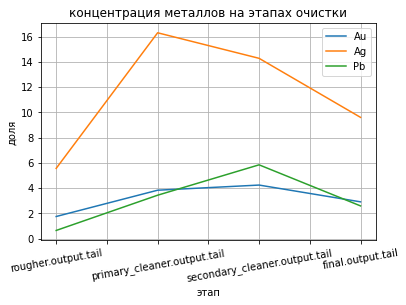

In [79]:
#теперь проанализируем аналогичную динамику в отвальных хвостах
tail = pd.DataFrame({'Этап': ["rougher.output.tail", "primary_cleaner.output.tail", "secondary_cleaner.output.tail",
                       "final.output.tail"], 
              "Au": [df_train["rougher.output.tail_au"].mean(), df_train["primary_cleaner.output.tail_au"].mean(),
                     df_train["secondary_cleaner.output.tail_au"].mean(), df_train["final.output.tail_au"].mean()],
              "Ag": [df_train["rougher.output.tail_ag"].mean(), df_train["primary_cleaner.output.tail_ag"].mean(),
                     df_train["secondary_cleaner.output.tail_ag"].mean(), df_train["final.output.tail_ag"].mean()],
              "Pb": [df_train["rougher.output.tail_pb"].mean(), df_train["primary_cleaner.output.tail_pb"].mean(),
                     df_train["secondary_cleaner.output.tail_pb"].mean(), df_train["final.output.tail_pb"].mean()],             
             }).set_index("Этап")
display(tail)
tail.plot.line(grid=True, rot = 10)
plt.xlabel('этап')
plt.ylabel("доля")
plt.title("концентрация металлов на этапах очистки")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

По второму графику можно сделать вывод, что доля серебра в отвальных хвостах довольно значительная и достигает 16%. Вероятно это и есть причина, почему концентрация серебра в сырье падает: оно остается в отвальных хвостах, поскольку не является основной целью процесса обогащения золотоносной руды. Но поскольку серебро также является драгоценным металлом, то **отвальные хвосты можно использовать в качестве сырья для последующего извлечения серебра.** 

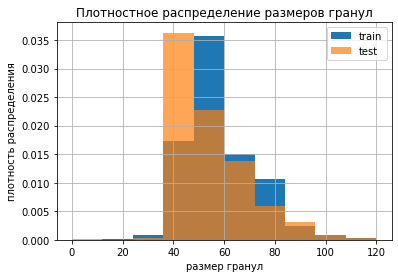

In [80]:
#сравним распределения размеров гранул сырья на обучающей и тестовой выборках.
x = df_train["rougher.input.feed_size"].hist(bins=10, range=(0, 120),label = 'train', density=True)
y = df_test["rougher.input.feed_size"].hist(bins=10, range=(0, 120), label = 'test', alpha=0.7, density=True)
plt.xlabel('размер гранул')
plt.ylabel('плотность распределения')
plt.title("Плотностное распределение размеров гранул")
x.legend()
y.legend()
plt.show()

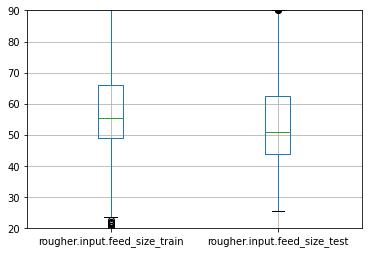

In [81]:
#построим диаграмму ящик с усами чтобы оценить распределение размеров гранул
df_feed_size = pd.concat([df_train["rougher.input.feed_size"], df_test["rougher.input.feed_size"]], axis=1)
df_feed_size.columns = ['rougher.input.feed_size_train', 'rougher.input.feed_size_test']
df_feed_size.boxplot(column=['rougher.input.feed_size_train', 'rougher.input.feed_size_test'])
plt.ylim(20, 90)
plt.show()

In [82]:
df_feed_size.describe().T

,count,mean,std,min,25%,50%,75%,max
rougher.input.feed_size_train,14005.0,60.110518,22.418485,9.659576,48.973027,55.373885,66.080172,484.967466
rougher.input.feed_size_test,5289.0,55.951097,19.081758,0.046369,43.906347,50.841029,62.431047,392.494040


На гистограмме видно, что размер гранул в тестовой выборке немного смещен влево по сравнению с обучающей выборкой, однако на диаграмме ящик с усами и в основных статистических параметрах мы видим, что распределение размеров гранул сырья не сильно отличаются друг от друга: средний размер гранул находится в диапазоне 56-60 мм, а стандартное отклонение составляет 19-22 мм.
**Таким образом, размер гранул в тестовой выборке не окажет сильного значения на эффективность модели.**

In [83]:
#исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.
df_train["c_0"] = (df_train["rougher.input.feed_pb"] + df_train["rougher.input.feed_au"] +
       df_train["rougher.input.feed_ag"] + df_train["rougher.input.feed_sol"])

df_train["c_1"] = (df_train["rougher.output.concentrate_pb"] + df_train["rougher.output.concentrate_au"] +
       df_train["rougher.output.concentrate_ag"] + df_train["rougher.output.concentrate_sol"])

df_train["c_2"]= (df_train["primary_cleaner.output.concentrate_pb"] + df_train["primary_cleaner.output.concentrate_au"] +
       df_train["primary_cleaner.output.concentrate_ag"] + df_train["primary_cleaner.output.concentrate_sol"])

df_train["c_3"] = (df_train["final.output.concentrate_pb"] + df_train["final.output.concentrate_au"] +
       df_train["final.output.concentrate_ag"] + df_train["final.output.concentrate_sol"])

c_all = pd.concat([df_train["c_0"], df_train["c_1"], df_train["c_2"], df_train["c_3"]], axis=1)
c_all.columns = ["rougher_input_feed", "rougher_output_concentrate", "primary_cleaner_output_concentrate", "final_output_concentrate" ]
c_all.describe()

,rougher_input_feed,rougher_output_concentrate,primary_cleaner_output_concentrate,final_output_concentrate
count,13976.000000,14127.000000,13863.000000,13937.000000
mean,56.341625,67.196296,60.363526,68.485831
std,6.980747,12.697690,10.397056,7.015500
min,0.040000,0.000000,0.000000,0.000000
25%,52.707027,64.934495,58.353899,67.651658
50%,56.688539,69.183282,61.903283,69.180810
75%,60.846130,73.434606,65.417114,71.013556
max,74.458253,88.140119,76.918076,80.210644


Мы видим, что в результат этапов очистки суммарная концентрация всех веществ (Au, Ag, Pb и Sol) в целом возрастает с 56% до 68%. **Однако так же мы наблюдаем аномальные значения в виде нулевой концентрации, что никак не может соответствовать реальности.** Построим диаграмму ящик с усами, чтобы оценить диапазон нормальных значений.

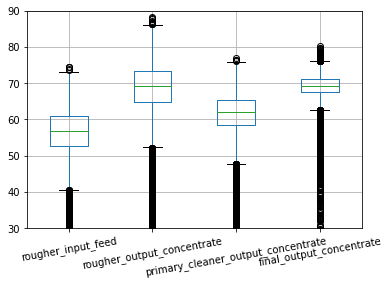

In [84]:
c_all.boxplot(rot = 10)
plt.ylim(30, 90)
plt.show()

**Для более точного предсказания модели лучше оставить качественные данные, а выбросы удалить**, используя формулу для нижней границы Q1 - 1.5*IQR, а для верхней Q3 + 1.5*IQR.

In [85]:
df_train = df_train.query('c_0 > 41 and c_0 < 73 \
                           and c_1 > 52 and c_1 < 86 \
                           and c_2 > 48 and c_2 < 76 \
                           and c_3 > 62 and c_3 < 76')
df_train.shape

(11653, 92)

**После удалени выбросов наша обучающая выборка стала на 17,6% меньше, однако качество данных значительно улучшилось.**

## Модель

In [86]:
#введем новую метрику качества sMAPE (англ. Symmetric Mean Absolute Percentage Error),
#где A - actuals (фактические значения целевого признака), F - forecast (предсказания целевого признака)
def smape(A, F):
    return 1/len(A) * sum(2 * abs(A - F) / (abs(A) + abs(F))*100)

Во избежание утечки целевого признака оставим только те из них, которые нам известны к началу работы модели: это все признаки типа Input, поскольку они характеризуют параметры сырья и ингридиентов, которые используется для обогащения золотоносной руды. **Так как нам нужно сразу две величины (эффективность обогащения чернового концентрата rougher.output.recovery и эффективность обогащения финального концентрата final.output.recovery), то и моделей будет две, каждая со своими признаками.** 
Сначала подготовим модель для расчета признака rougher.output.recovery.

In [87]:
df_train_rougher = df_train.iloc[:, 34:44].join(df_train.iloc[:, 48])
df_train_rougher.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11653 entries, 0 to 14148
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   rougher.input.feed_ag               11653 non-null  float64
 1   rougher.input.feed_pb               11653 non-null  float64
 2   rougher.input.feed_rate             11652 non-null  float64
 3   rougher.input.feed_size             11541 non-null  float64
 4   rougher.input.feed_sol              11653 non-null  float64
 5   rougher.input.feed_au               11653 non-null  float64
 6   rougher.input.floatbank10_sulfate   11650 non-null  float64
 7   rougher.input.floatbank10_xanthate  11652 non-null  float64
 8   rougher.input.floatbank11_sulfate   11635 non-null  float64
 9   rougher.input.floatbank11_xanthate  11344 non-null  float64
 10  rougher.output.recovery             11653 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


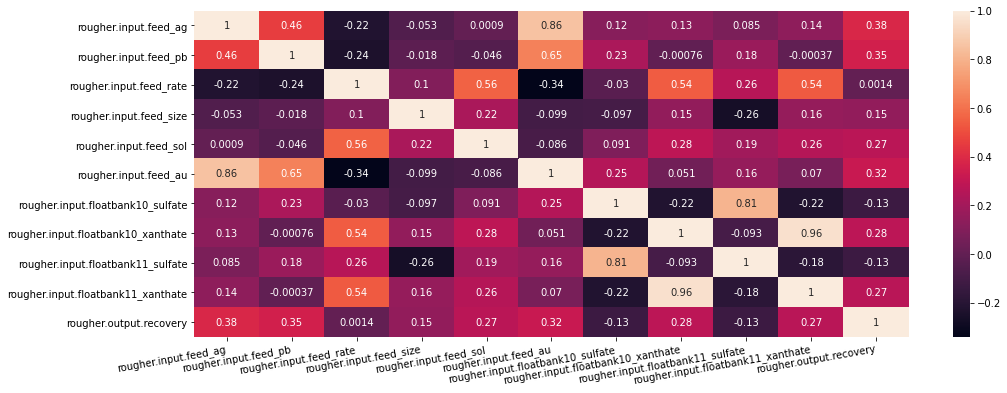

In [88]:
#построим корреляционную матрицу признаков и диграммы рассеивания для них
plt.figure(figsize=(16,6))
g = sns.heatmap(df_train_rougher.corr(),annot=True)
g.set_xticklabels(g.get_xticklabels(), rotation=10, horizontalalignment='right')
plt.show()

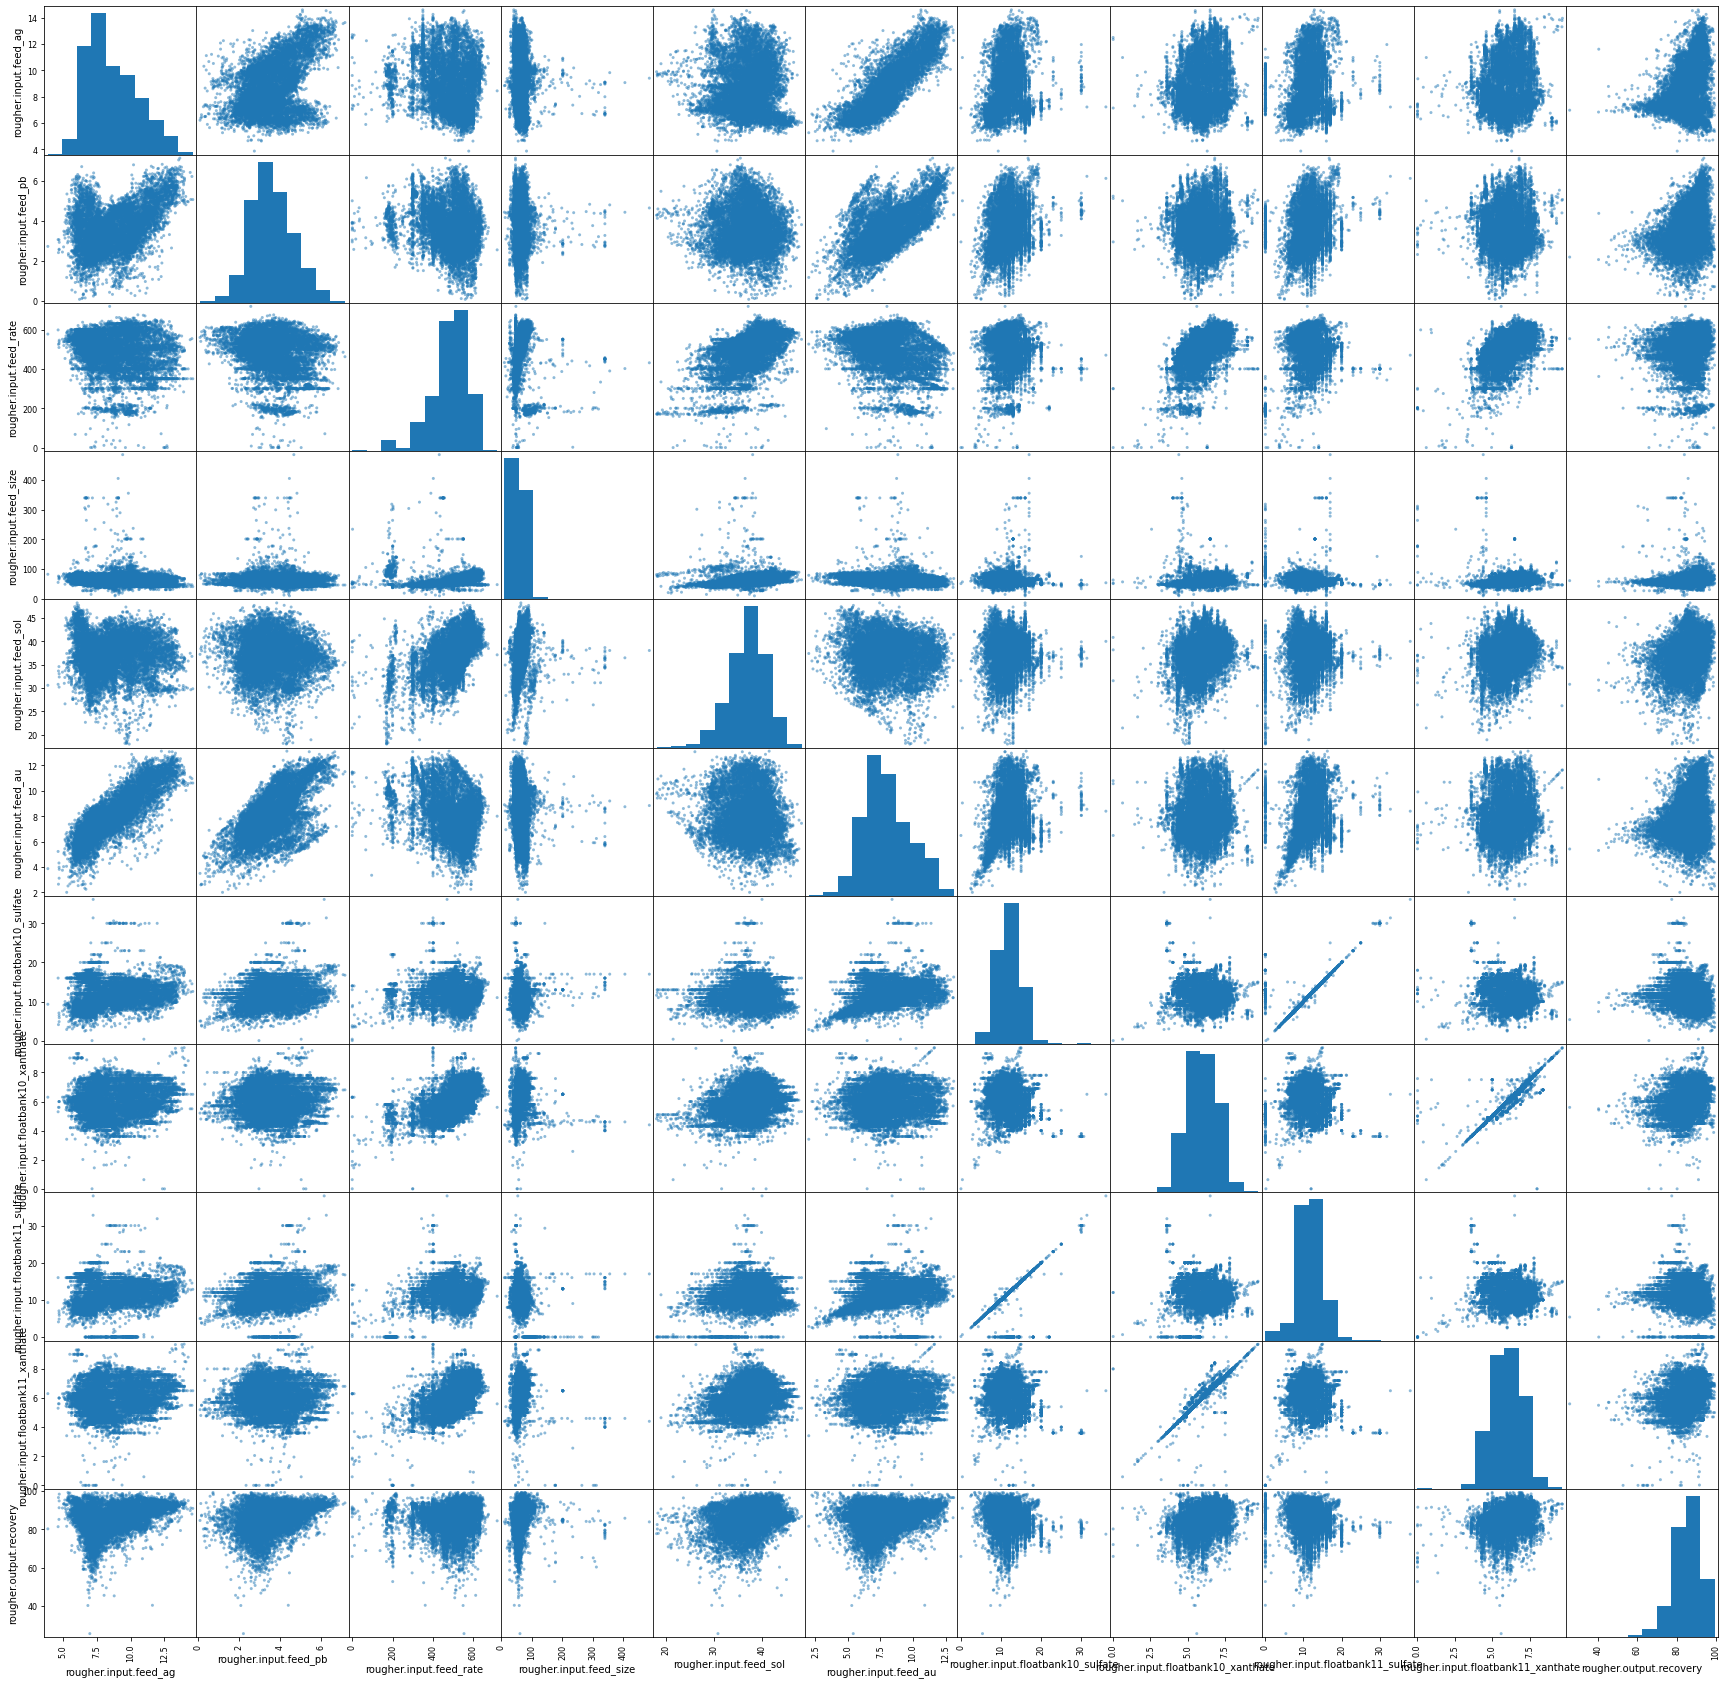

In [89]:
pd.plotting.scatter_matrix(df_train_rougher, figsize=(30, 30))
plt.show()

**Мы наблюдаем мультиколлинеарность между следующими парами (коэффициент корреляции выше 0,6)*:
 - rougher.input.feed_au и rougher.input.feed_ag;
 - rougher.input.feed_au и rougher.input.feed_pb;
 - rougher.input.floatbank10_xanthate и rougher.input.floatbank11_xanthate
 - rougher.input.floatbank10_sulfate и rougher.input.floatbank11_sulfate
 
Непосредственно сам целевой признак rougher.output.recovery сильной корреляции с другими признаками не имеет.
**Чтобы избежать неопределенности значений параметров, исключим один из парных признаков для дальнейшего анализа.** Оставим признаки, связанные непосредственно с золотом, и floatbank 10.

In [90]:
df_train_rougher = df_train_rougher.drop(['rougher.input.feed_ag', 'rougher.input.feed_pb',
                                          'rougher.input.floatbank11_xanthate',
                                          'rougher.input.floatbank11_sulfate'], axis = 1)
df_train_rougher.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11653 entries, 0 to 14148
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   rougher.input.feed_rate             11652 non-null  float64
 1   rougher.input.feed_size             11541 non-null  float64
 2   rougher.input.feed_sol              11653 non-null  float64
 3   rougher.input.feed_au               11653 non-null  float64
 4   rougher.input.floatbank10_sulfate   11650 non-null  float64
 5   rougher.input.floatbank10_xanthate  11652 non-null  float64
 6   rougher.output.recovery             11653 non-null  float64
dtypes: float64(7)
memory usage: 986.4 KB


In [91]:
#оценим долю пропусков в полученной выборке
df_train_rougher.isna().mean().sort_values(ascending = False)

rougher.input.feed_size               0.009611
rougher.input.floatbank10_sulfate     0.000257
rougher.input.feed_rate               0.000086
rougher.input.floatbank10_xanthate    0.000086
rougher.input.feed_sol                0.000000
rougher.input.feed_au                 0.000000
rougher.output.recovery               0.000000
dtype: float64

**По всем столбцам доля пропусков незначительная (менее 1%), поэтому можно их смело удалить.**

In [92]:
df_train_rougher = df_train_rougher.dropna()
df_train_rougher.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11539 entries, 0 to 14148
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   rougher.input.feed_rate             11539 non-null  float64
 1   rougher.input.feed_size             11539 non-null  float64
 2   rougher.input.feed_sol              11539 non-null  float64
 3   rougher.input.feed_au               11539 non-null  float64
 4   rougher.input.floatbank10_sulfate   11539 non-null  float64
 5   rougher.input.floatbank10_xanthate  11539 non-null  float64
 6   rougher.output.recovery             11539 non-null  float64
dtypes: float64(7)
memory usage: 721.2 KB


In [93]:
#Подготовим аналогично тестовую выборку
df_test_rougher = df_test.iloc[:, 15:21].join(df_test.iloc[:, 53:55])
df_test_rougher = df_test_rougher.dropna()
df_test_rougher.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5265 entries, 0 to 5289
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   rougher.input.feed_rate             5265 non-null   float64
 1   rougher.input.feed_size             5265 non-null   float64
 2   rougher.input.feed_sol              5265 non-null   float64
 3   rougher.input.feed_au               5265 non-null   float64
 4   rougher.input.floatbank10_sulfate   5265 non-null   float64
 5   rougher.input.floatbank10_xanthate  5265 non-null   float64
 6   rougher.output.recovery             5265 non-null   float64
 7   final.output.recovery               5265 non-null   float64
dtypes: float64(8)
memory usage: 370.2 KB


In [94]:
#выведем основные статистические характеристики признаков
df_test_rougher.describe()

,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.output.recovery,final.output.recovery
count,5265.000000,5265.000000,5265.000000,5265.000000,5265.000000,5265.000000,5265.000000,5265.000000
mean,490.766898,55.971521,37.723566,9.342174,13.875944,6.482030,85.059572,68.546513
std,106.364704,19.099935,5.471091,1.609624,3.326674,1.031189,12.964802,9.349514
min,0.002986,0.046369,1.393488,2.214112,0.001147,0.000568,0.000000,0.000000
25%,407.959642,43.911874,34.507706,8.215546,11.996196,5.999004,84.546007,65.553223
50%,499.295245,50.855392,37.980276,9.595723,14.003454,6.498315,87.394457,69.848975
75%,575.915307,62.431047,41.637491,10.465737,16.981850,7.093438,89.737099,73.297177
max,707.364020,392.494040,53.477742,13.731330,24.280636,8.910468,99.169699,100.000000


Можно заметить, что  признаки rougher.input.feed_rate и rougher.input.feed_size имеют гораздо больший масштаб по сравнению с остальными. Стандартизируем эти признаки.

In [95]:
numeric =  ['rougher.input.feed_rate', 'rougher.input.feed_size']
scaler = StandardScaler()
scaler.fit(df_train_rougher[numeric])
df_train_rougher[numeric] = scaler.transform(df_train_rougher[numeric])
df_test_rougher[numeric] = scaler.transform(df_test_rougher[numeric])
pd.options.mode.chained_assignment = None

In [96]:
# теперь объявим переменные с признаками и целевым признаком для каждой из полученных выборок
x = df_train_rougher.drop(['rougher.output.recovery'], axis = 1)
y = df_train_rougher['rougher.output.recovery']
x_test = df_test_rougher.drop(['rougher.output.recovery', 'final.output.recovery'], axis = 1)
y_test = df_test_rougher['rougher.output.recovery']

In [99]:
#обучим модель линейной регрессии и оценим ее качество кросс-валидацией
lr = LinearRegression()
scorer = make_scorer(smape)
cross_val_score(lr, x, y, scoring=scorer, cv=5, n_jobs=-1).mean()

6.172873067570724

In [28]:
#подберем гиперпараметры для решающего дерева с помощью GridSearchCV
parametrs = {'max_depth': range (1, 5)}
dtr = DecisionTreeRegressor(random_state=12345)
scorer = make_scorer(smape, greater_is_better=False)
grid = GridSearchCV(dtr, parametrs, scoring=scorer)
grid.fit(x, y) 
display(grid.best_params_)

{'max_depth': 2}

In [29]:
dtr = DecisionTreeRegressor(random_state=12345, max_depth=2)
scorer = make_scorer(smape)
cross_val_score(dtr, x, y, scoring=scorer, cv=5).mean()

6.645351323709673

In [30]:
# подберем гиперпараметры для случайного леса с помощью GridSearchCV
parametrs = { 'n_estimators': range (10, 101, 10),
               'max_depth': range (1, 5)}
rfr = RandomForestRegressor(random_state=12345)
scorer = make_scorer(smape, greater_is_better=False)
grid = GridSearchCV(rfr, parametrs, scoring=scorer)
grid.fit(x, y) 
display(grid.best_params_)

{'max_depth': 2, 'n_estimators': 100}

In [31]:
rfr = RandomForestRegressor(random_state=12345, n_estimators=100, max_depth=2)
scorer = make_scorer(smape)
cross_val_score(rfr, x, y, scoring=scorer, cv=5).mean()

6.341139730487477

**Мы видим, что наибольшую точность при кросс-валидационной проверке по метрике SMAPE нам дала модель линейной регрессии.**

Теперь построим вторую модель для прогнозирования второго целевого признака final.output.recovery. Для этого подготовим соответствующие обучающие и тестовые выборки, изменив целевой признак и добавив новые признаки этапа primary_cleaner.

In [32]:
df_train_final = df_train_rougher.join(df_train.iloc[:, 5]).join(df_train.iloc[:, 10:13])
df_train_final = df_train_final.drop('rougher.output.recovery', axis=1)
df_train_final = df_train_final.dropna()

df_test_final = df_test_rougher.join(df_test.iloc[:, 1:4])
df_test_final = df_test_final.drop('rougher.output.recovery', axis=1)
df_test_final = df_test_final.dropna()

display(df_train_final.info(),
        df_test_final.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11531 entries, 0 to 14148
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   rougher.input.feed_rate             11531 non-null  float64
 1   rougher.input.feed_size             11531 non-null  float64
 2   rougher.input.feed_sol              11531 non-null  float64
 3   rougher.input.feed_au               11531 non-null  float64
 4   rougher.input.floatbank10_sulfate   11531 non-null  float64
 5   rougher.input.floatbank10_xanthate  11531 non-null  float64
 6   final.output.recovery               11531 non-null  float64
 7   primary_cleaner.input.sulfate       11531 non-null  float64
 8   primary_cleaner.input.depressant    11531 non-null  float64
 9   primary_cleaner.input.feed_size     11531 non-null  float64
dtypes: float64(10)
memory usage: 990.9 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5262 entries, 0 to

None

None

In [33]:
q = df_train_final.drop(['final.output.recovery'], axis = 1)
z = df_train_final['final.output.recovery']
q_test = df_test_final.drop(['final.output.recovery'], axis = 1)
z_test = df_test_final['final.output.recovery']

In [34]:
#обучим модель линейной регрессии и оценим ее качество кросс-валидацией
lr = LinearRegression()
scorer = make_scorer(smape)
cross_val_score(lr, q, z, scoring=scorer, cv=5, n_jobs=-1).mean()

7.805093759524058

In [35]:
#подберем гиперпараметры для решающего дерева с помощью GridSearchCV
parametrs = {'max_depth': range (1, 5)}
dtr = DecisionTreeRegressor(random_state=12345)
scorer = make_scorer(smape, greater_is_better=False)
grid = GridSearchCV(dtr, parametrs, scoring=scorer)
grid.fit(q, z) 
display(grid.best_params_)

{'max_depth': 4}

In [36]:
dtr = DecisionTreeRegressor(random_state=12345, max_depth=4)
scorer = make_scorer(smape)
cross_val_score(dtr, q, z, scoring=scorer, cv=5).mean()

8.478236397863027

In [37]:
#подберем гиперпараметры для случайного леса с помощью GridSearchCV
parametrs = { 'n_estimators': range (10, 101, 10),
               'max_depth': range (1, 5)}
rfr = RandomForestRegressor(random_state=12345)
scorer = make_scorer(smape, greater_is_better=False)
grid = GridSearchCV(rfr, parametrs, scoring=scorer)
grid.fit(q, z) 
display(grid.best_params_)

{'max_depth': 4, 'n_estimators': 30}

In [38]:
rfr = RandomForestRegressor(random_state=12345, n_estimators=30, max_depth=4)
scorer = make_scorer(smape)
cross_val_score(rfr, q, z, scoring=scorer, cv=5).mean()

8.07630948173885

**Для второй модели наилучший результат показала модель линейной регрессии.** 

Сравним значения полученных метрик с константными моделями.

In [100]:
dr = DummyRegressor(strategy='median').fit(x, y) 
y_pred = dr.predict(y_test)
display(smape(y_test, y_pred))

dr = DummyRegressor(strategy='median').fit(q, z) 
z_pred = dr.predict(z_test)
display(smape(z_test, z_pred))

8.3000623553948

9.3696843891329

Значения метрик SMAPE, полученные на моделях линейной регрессии ниже, нежели значения для константных моделей: 6.17 vs 8.30 и 7.80 vs 9.37. **Проверим итоговую модель на тестовой выборке.**

In [101]:
model_rougher = LinearRegression()
model_rougher.fit(x, y) 
y_pred = model_rougher.predict(x_test)
smape_rougher = smape(y_test, y_pred)
print("sMAPE_rougher:", "{:,.2f}".format(smape_rougher))

sMAPE_rougher: 7.76


In [102]:
model_final = LinearRegression()
model_final.fit(q, z) 
z_pred = model_final.predict(q_test)
smape_final = smape(z_test, z_pred)
print("sMAPE_final:", "{:,.2f}".format(smape_final))

sMAPE_final: 9.40


In [103]:
#финальная метрика:
SMAPE = smape_rougher*0.25 + smape_final*0.75
SMAPE

8.991178369884494

**Посмотрим, какие факторы оказывают наибольшее влияние на наши модели.**

,name,coef
0,rougher.input.feed_rate,-1.640693
1,rougher.input.feed_size,0.515811
2,rougher.input.feed_sol,0.642644
3,rougher.input.feed_au,1.256477
4,rougher.input.floatbank10_sulfate,-0.451068
5,rougher.input.floatbank10_xanthate,1.637968


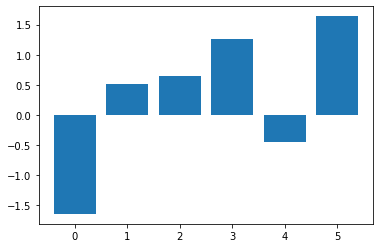

In [104]:
display(pd.DataFrame({'name':x.columns,'coef':model_rougher.coef_}))
plt.bar([x for x in range(len(model_rougher.coef_))], model_rougher.coef_)
plt.show()

,name,coef
0,rougher.input.feed_rate,-0.217561
1,rougher.input.feed_size,0.565900
2,rougher.input.feed_sol,0.180368
3,rougher.input.feed_au,1.260154
4,rougher.input.floatbank10_sulfate,-0.600791
5,rougher.input.floatbank10_xanthate,1.783034
6,primary_cleaner.input.sulfate,0.047333
7,primary_cleaner.input.depressant,-0.340471
8,primary_cleaner.input.feed_size,0.427926


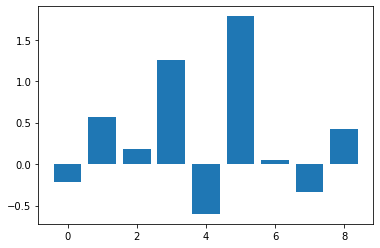

In [105]:
display(pd.DataFrame({'name':q.columns,'coef':model_final.coef_}))
plt.bar([x for x in range(len(model_final.coef_))], model_final.coef_)
plt.show()

**Таким образом, наилучший результат показала модель линейной регрессии для предсказания обоих целевых признаков.
  Финальная метрика SMAPE - 8,99**

Наиболее значимыми признаками при прогнозировании rougher.output.recovery стали:
 - rougher.input.feed_rate (коэффициент -1.6)
 - rougher.input.floatbank10_xanthate (коэффициент 1.6)
 - rougher.input.feed_au (коэффициент 1.3)
 - rougher.input.feed_sol (коэффициент 0.6)
 - rougher.input.feed_size (коэффициент 0.5)

 
В свою очередь на  final.output.recovery сильнее всего влияют:
 - rougher.input.floatbank10_xanthate (коэфициент 1.8)
 - rougher.input.feed_au	(коэффициент 1.3)
 - rougher.input.floatbank10_sulfate	(коэффициент -0.6)
 - primary_cleaner.input.feed_size (коэффициент 0.6)
 - primary_cleaner.input.feed_size	(коэффициент 0.4)